<a href="https://colab.research.google.com/github/antidude900/pytorch_learning/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [54]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform= None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [55]:
len(train_data),len(test_data)

(60000, 10000)

In [56]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [57]:
image,label = train_data[59999]
image,image.shape,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

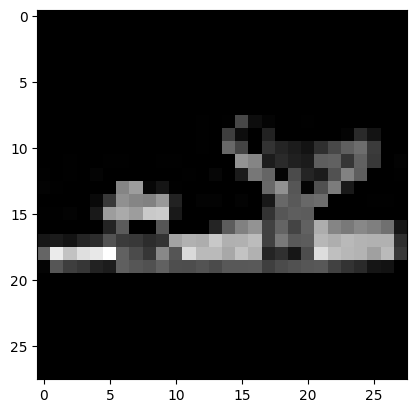

In [58]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(),cmap="gray")

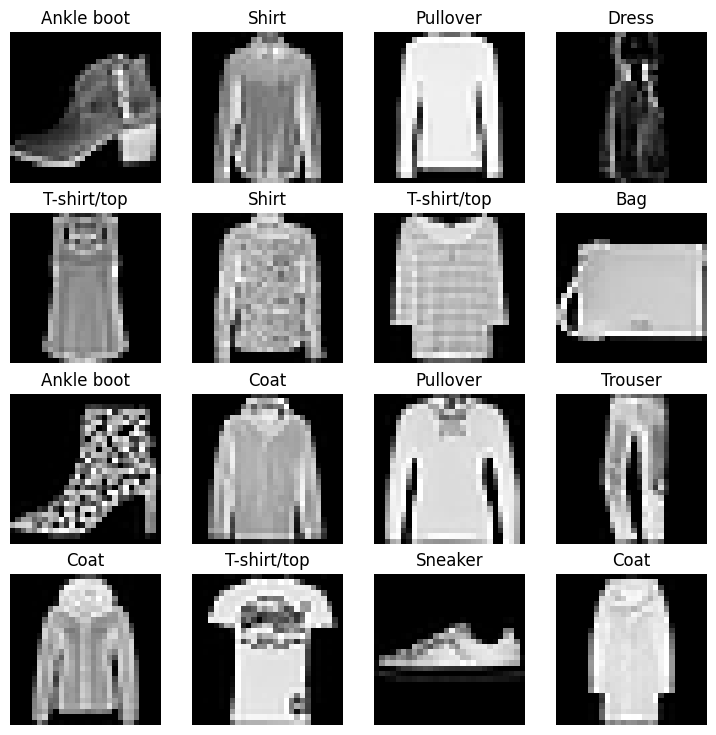

In [59]:
fig = plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title((train_data.classes)[label])
  plt.axis(False)

In [60]:
#For representing a picture, we use color * height * width 3d tensor.
"""For a grayscale picture, we are using a 1 * 28 * 28 3D tensor.
You might get confused for why we are using 1 for color length though grayscale images are made from colors between white and black.
Well the more the color is white, the less the color is black.
So as there are only two options which are related to each other, we can use only one to describe the other too!
So for each width of each height, we give value between 0 and 1 to describe the intensity of that pixel.
The more closer to 1 the more white and the more closer to 0 the more black

For a colorful picture, we are using a  3 * 28 * 28 3D tensor.
Here, the colors are stored in 3 different blocks. One block for red color, one for blue color and one for green.
Each block stores the intensity of its corresponding color for each widght of each height. The value ranges from 0-255"""


'For a grayscale picture, we are using a 1 * 28 * 28 3D tensor.\nYou might get confused for why we are using 1 for color length though grayscale images are made from colors between white and black.\nWell the more the color is white, the less the color is black.\nSo as there are only two options which are related to each other, we can use only one to describe the other too!\nSo for each width of each height, we give value between 0 and 1 to describe the intensity of that pixel.\nThe more closer to 1 the more white and the more closer to 0 the more black\n\nFor a colorful picture, we are using a  3 * 28 * 28 3D tensor.\nHere, the colors are stored in 3 different blocks. One block for red color, one for blue color and one for green.\nEach block stores the intensity of its corresponding color for each widght of each height. The value ranges from 0-255'

In [61]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_features_batch,train_labels_batch = next(iter(train_dataloader))
test_features_batch,test_labels_batch = next(iter(test_dataloader))

In [62]:
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [63]:
class FashionModelV0(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [64]:
model_0 = FashionModelV0(
    input_shape = 28*28,
    hidden_units = 20,
    output_shape = 10
)
model_0

FashionModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [66]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper function.py already exists!")
else:
  print("Downloading helper_functions.py")
  request  =  requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


helper function.py already exists!


In [69]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

In [70]:
from timeit import default_timer as timer

def print_train_time(start,end,device):
  time  = end - start
  print(f"Time taken to train on {device} is {time:.3f} seconds")
  return time